
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon


In [4]:
from IPython.display import display,Math,Latex
import pandas as pd

In [2]:
display(Math(r"Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon"))

<IPython.core.display.Math object>

In [6]:
df = pd.read_csv("data_mlr.csv")

In [7]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
ols = display(Math(r"\text{Minimize: } \sum_{i=1}^n \left( Y_i - (\beta_0' + \beta_1X_{i1} + \dots + \beta_pX_{ip}) \right)^2"))

<IPython.core.display.Math object>

In [18]:
display(Math(r"\text{H0: }:\text{null hipotez:} \beta_i = 0"))

<IPython.core.display.Math object>

In [19]:
display(Math(r"\text{H1: }: \text{Altelnativ hipotez:} \beta_i != 0"))

<IPython.core.display.Math object>

hipotez test ucun (Null ve altelnatif test ucun dustur):


In [20]:
display(Math(r"t= \frac{\hat{\beta_i}}{\text{SE}(\hat{\beta_i})}"))

<IPython.core.display.Math object>

t = t-statistik <--->
    beta_i = texmin edilen koef <---->
    SE(beta_i) = texmin edilen koefin standart erorunu 

    

p<0.05:null hipotez redd olunur                                                        p>=0.05:null hipotez reddd olunmur


In [21]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 4.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 8.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 10.2 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 10.7 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 8.5 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.2 MB/s eta 0:00:00


OLS hesablama qaydasi 

In [ ]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm


In [36]:
X=df[['TV','radio','newspaper']] 
y = df['sales']

In [37]:
X_const = sm.add_constant(X)
X_const

,const,TV,radio,newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [ ]:
model = sm.OLS(y,X_const).fit()
# 

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        18:30:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
df = pd.read_csv("data_mlr.csv")

In [42]:
X = df[['TV','radio','newspaper']]
y = df['sales']


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = mlr.predict(X_test)

In [46]:
print("mse:",mean_squared_error(y_test,y_pred))
print("r_score:",r2_score(y_test,y_pred))

mse: 3.1740973539761033
r_score: 0.899438024100912


In [47]:
import matplotlib.pyplot as plt 

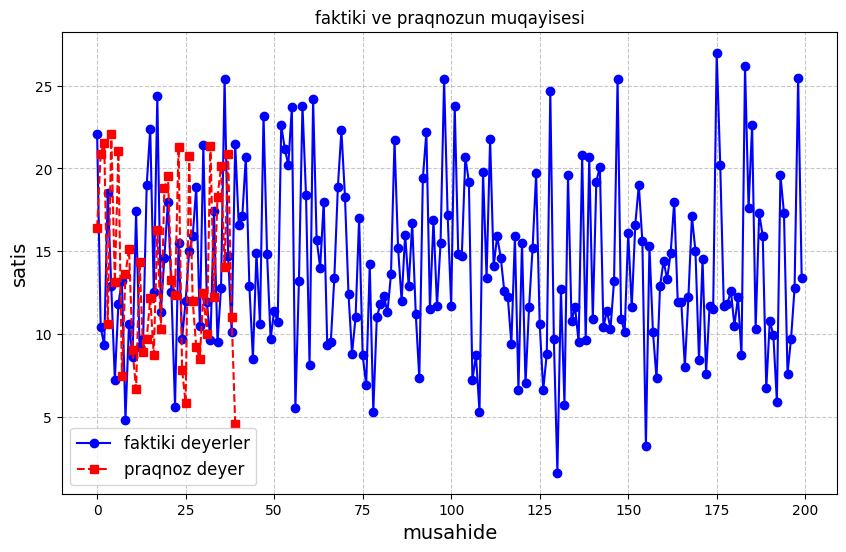

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y)),y,label='faktiki deyerler',marker='o',linestyle='-',color='b')
plt.plot(range(len(y_pred)),y_pred,label="praqnoz deyer",marker='s',linestyle='--',color='r')
plt.title("faktiki ve praqnozun muqayisesi")
plt.xlabel("musahide",fontsize=14)
plt.ylabel("satis",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

In [50]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [51]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64